In [2]:
pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 8.6 MB/s eta 0:00:00


In [3]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

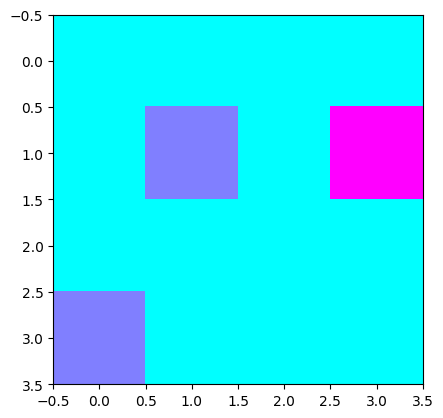

In [ ]:
output_grid = widgets.Grid(1, 1)

# Define reward state coordinates
reward_states = [(1, 1), (3, 0),(1,3)]

for _ in range(5):
  grid = np.zeros((4, 4))
  
  # Set rewards states on the grid
  for state in reward_states:
    grid[state] = 0.5

  # Set agent state on the grid
  agent_state = (np.random.randint(4), np.random.randint(4))
  grid[agent_state] = 1
  
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid, cmap='cool')

  # Check if agent has landed on a reward state
  if agent_state in reward_states:
    # Update color of specific reward state
    grid[agent_state] = 0.9
    break

# **PART I - Defining a RL Environment**

In [ ]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 12

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.battery_pos = [1, 1]
        self.battery_pos1 = [3, 0]
        self.battery_pos2 = [1, 3]
        self.rock_pos = [2, 2]
        self.rock_pos1 = [3,1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        
    def reset(self, **kwargs):

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        observation = self.state.flatten()
        info = {}
       
        return observation, info
    
    def step(self, action):

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        observation = self.state.flatten()
        
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 25
        elif np.array_equal(self.agent_pos, self.battery_pos):
            reward += 5
        elif np.array_equal(self.agent_pos, self.battery_pos1):
            reward += 5
        elif np.array_equal(self.agent_pos, self.battery_pos2):
            reward += 5 
        elif np.array_equal(self.agent_pos, self.rock_pos):
            reward -= 6
        elif np.array_equal(self.agent_pos, self.rock_pos1):
            reward -= 6
        
        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False

        info = {}
        
        return observation, reward, terminated, truncated, info
        
    def render(self):
        plt.imshow(self.state,cmap='coolwarm')

In [16]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step: 1 Current state: (0, 0) ; Chosen action:Up ;  Reward after action: 0


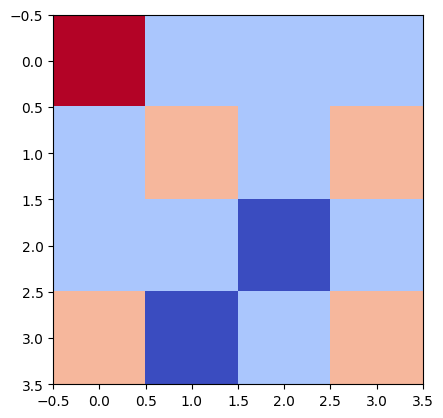

Step: 2 Current state: (0, 0) ; Chosen action:Down ; Reward after action: 0


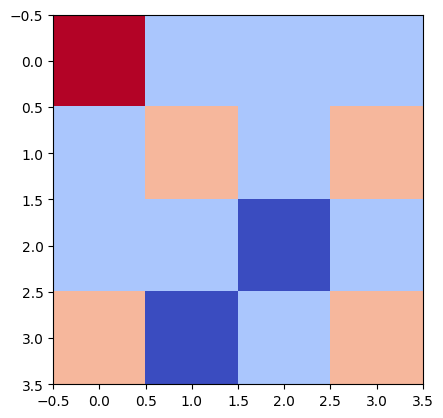

Step: 3 Current state: (1, 0) ; Chosen action:Up ;  Reward after action: 0


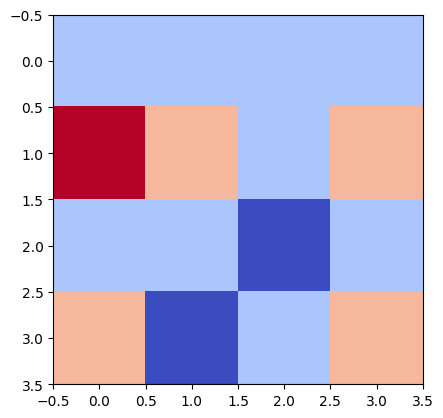

Step: 4 Current state: (0, 0) ; Chosen action:Up ;  Reward after action: 0


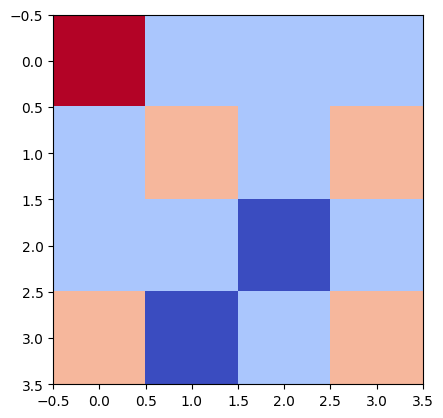

Step: 5 Current state: (0, 0) ; Chosen action:Down ; Reward after action: 0


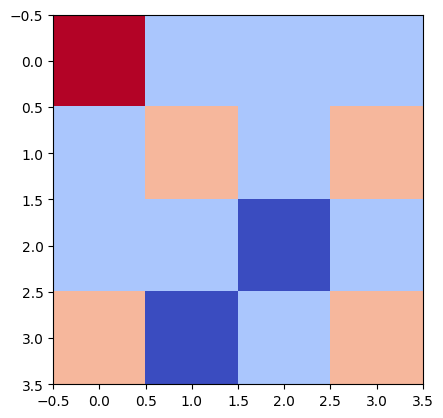

Step: 6 Current state: (1, 0) ; Chosen action:Up ;  Reward after action: 0


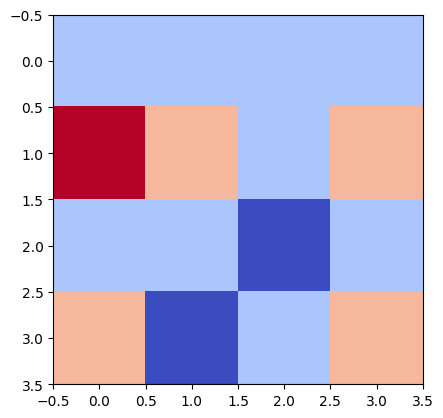

Step: 7 Current state: (0, 0) ; Chosen action:Left;  Reward after action: 0


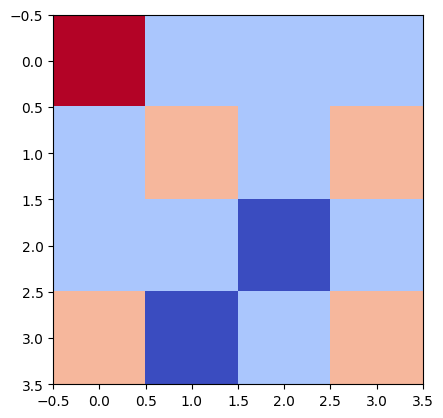

Step: 8 Current state: (0, 0) ; Chosen action:Right;  Reward after action: 0


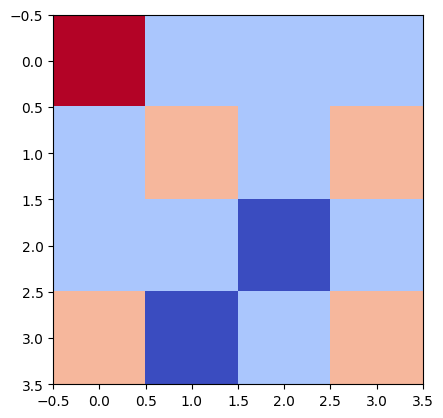

Step: 9 Current state: (0, 1) ; Chosen action:Down ; Reward after action: 5


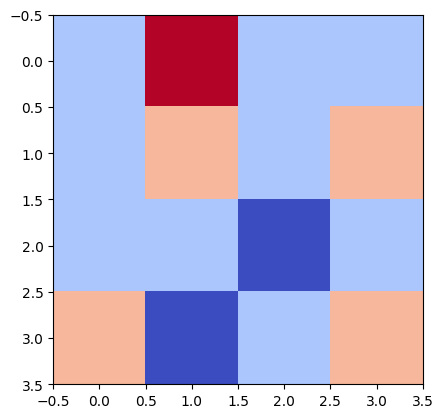

Step: 10 Current state: (1, 1) ; Chosen action:Left;  Reward after action: 0


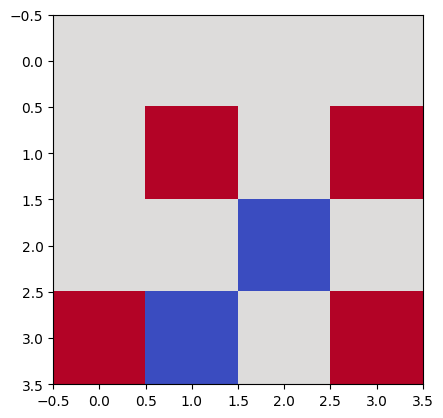

In [ ]:
env = GridEnvironment()
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

for i in range(10):
  #from initial state, you choose an action
  action = agent.step(obs)
  row, col = env.agent_pos
  env.render()
  print("Step:", i+1,end=" ")
  print("Current state: ({}, {}) ;".format(row, col),end=" ")
  # chosen action
  if action == 0:
    print("Chosen action:Down ;",end=" ")
  if action == 1:
    print("Chosen action:Up ; ",end=" ")
  if action == 2:
    print("Chosen action:Right; ",end=" ")
  if action == 3:
    print("Chosen action:Left; ",end=" ")
  obs_1, reward, terminated, truncated, info = env.step(action)
  obs = obs_1     
  print("Reward after action:", reward)
  plt.show()


# **PART II - SARSA IMPLEMENTATION**

In [4]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 12
        self.done = False

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.battery_pos = [1, 1]
        self.battery_pos1 = [3, 0]
        self.battery_pos2 = [1, 3]
        self.rock_pos = [2, 2]
        self.rock_pos1 = [3,1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        
    def reset(self, **kwargs):

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        observation = self.state.flatten()
       
        return observation
    
    def step(self, action):

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.battery_pos)] = 0.5
        self.state[tuple(self.battery_pos1)] = 0.5
        self.state[tuple(self.battery_pos2)] = 0.5
        self.state[tuple(self.rock_pos)] = -0.5
        self.state[tuple(self.rock_pos1)] = -0.5
        observation = self.state.flatten()
        
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 25
        elif np.array_equal(self.agent_pos, self.battery_pos):
            reward += 5
        elif np.array_equal(self.agent_pos, self.battery_pos1):
            reward += 10
        elif np.array_equal(self.agent_pos, self.battery_pos2):
            reward += 15 
        elif np.array_equal(self.agent_pos, self.rock_pos):
            reward -= 5
        elif np.array_equal(self.agent_pos, self.rock_pos1):
            reward -= 10
        
        self.timestep += 1 
        return self.agent_pos, reward, self.done
        
    def render(self):
        plt.imshow(self.state,cmap='coolwarm')

In [20]:

def sarsa(discount_factor = 0.95, timesteps =15, num_episodes =1000):
  env = GridEnvironment()
  obs = env.reset()
  learning_rate = 0.15
  start_epsilon = 0.99 
  current_state = 0 
  actions = [0,1,2,3]
  q_table = np.zeros((16, 4))
  rewards_list, num_timesteps, epsilon_values= [], [], []
  states = {}
  index_value ,row_val= 0,0
  while row_val < 4:
      column_val = 0
      while column_val < 4:
        states[(row_val,column_val)] = index_value
        index_value = index_value + 1
        column_val = column_val + 1
      row_val = row_val + 1
  done = False 
  total_episodes = num_episodes
  first_exploration_rate = 0.8
  last_exploration_rate = 0.05
  avg_timesteps = 0
  epsilon = 1 
  decay_factor = (last_exploration_rate/first_exploration_rate)**(1.0/total_episodes)
  for episode in range(1, total_episodes+1):
    obs = env.reset()
    current_state = 0 
    total_rewards = 0
    timestep = 0
    rand_num = np.random.random()
    if epsilon > rand_num:
      action = np.random.choice(actions)
    else:
      action = np.argmax(q_table[current_state])
    while timestep < timesteps:
    
      rand_num = np.random.random()
      if start_epsilon > rand_num: 
          
          next_state_pos, reward, done= env.step(action)
          next_state = states[tuple(next_state_pos)]
          rand_num = np.random.random()
          if epsilon > rand_num:
            next_action = np.random.choice(actions)
          else:
            next_action = np.argmax(q_table[next_state]) 
          q_table[current_state][action] = q_table[current_state][action] + learning_rate*(reward + discount_factor*q_table[next_state][next_action] - q_table[current_state][action])

          total_rewards += reward 
          timestep += 1
          current_state = next_state 
          action = next_action
          
          if done == True: 
            done = False
            break        
    avg_timesteps += timestep
    num_timesteps.append(avg_timesteps)

    rewards_list.append(total_rewards)
    epsilon_values.append(epsilon) 
    if epsilon > 0.01: 
        epsilon = epsilon*decay_factor
    else:
        epsilon = 0.01

  print("Q Table: \n", q_table)
  return q_table, rewards_list, epsilon_values

In [21]:
q_table, rewards_list, epsilon_values = sarsa(discount_factor = 0.95, timesteps = 15, num_episodes = 2000)

Q Table: 
 [[443.85008554 434.63011579 475.72639634 423.34793974]
 [ 36.3259763   18.05913245  36.48565142 193.83845906]
 [ 51.72765473  23.71073224  92.25905263  36.68269004]
 [257.09041102  93.59608779  93.3511929   31.66209911]
 [ 19.83198067 187.48065428  11.56458459   9.42595246]
 [ 29.46950814  24.08465538 124.40043856  25.96184006]
 [163.83950965  37.36923676 301.32019652  54.42718526]
 [409.11463067 155.73635136 269.59566484  83.01890457]
 [ 61.5828066   13.95383006  40.69647306   9.64409332]
 [ 72.437758    42.86919148 210.60063377  20.70408255]
 [282.07613655 176.19399059 423.17036232 109.92218826]
 [468.57879471 344.32722983 418.72059123 375.30900644]
 [ 46.16389909  22.56116609 181.31092263  39.59210834]
 [197.16162127  84.76454133 413.38332618  86.58299442]
 [411.47769773 381.98252279 466.98137919 336.4003846 ]
 [482.96792793 441.13519981 466.72588796 441.36284865]]


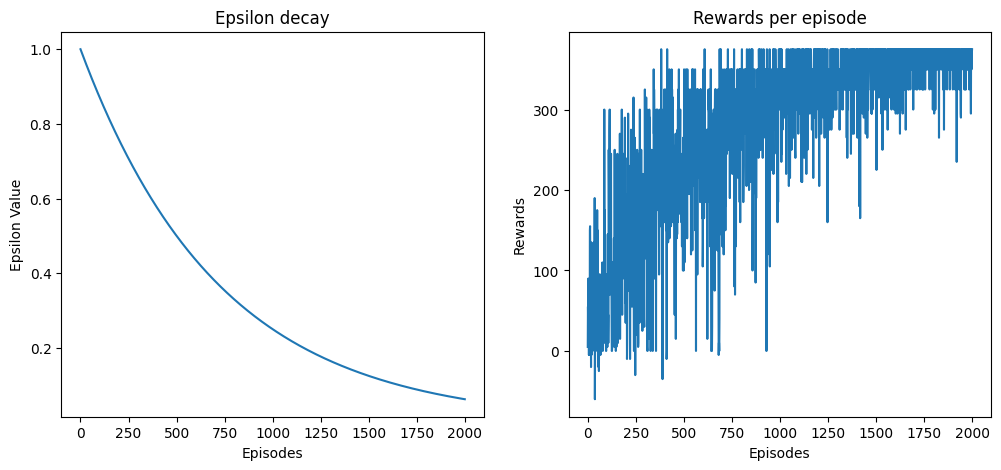

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")
plt.show()



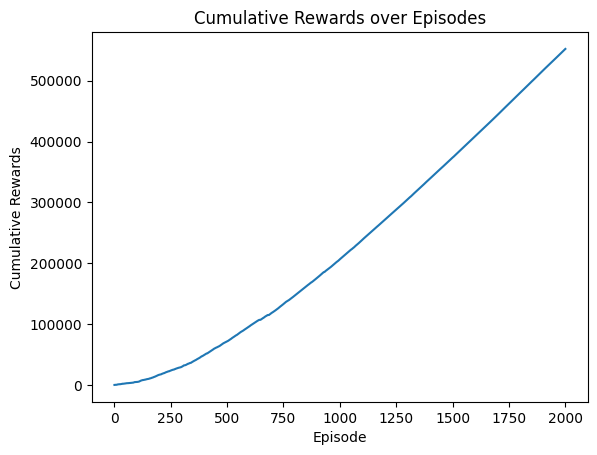

In [ ]:
cumulative_rewards = [sum(rewards_list[:i+1]) for i in range(len(rewards_list))]
plt.plot(range(1, len(rewards_list) + 1), cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards over Episodes')
plt.show()

**Evaluation Results - SARSA**

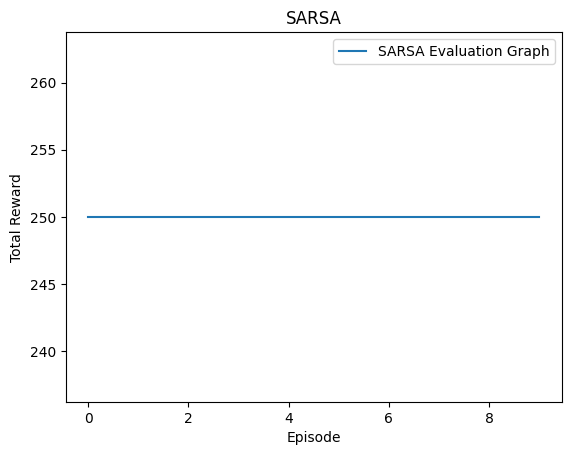

SARSA Evaluation Results:
Average Total Reward: 250.0
Maximum Total Reward: 250
Minimum Total Reward: 250


In [23]:
env = GridEnvironment()
num_evaluation_episodes = 10
rewards_sarsa_evaluation = []
states = {}
index_value ,row_val= 0,0
while row_val < 4:
    column_val = 0
    while column_val < 4:
      states[(row_val,column_val)] = index_value
      index_value = index_value + 1
      column_val = column_val + 1
    row_val = row_val + 1
for _ in range(num_evaluation_episodes):
    total_reward_sarsa = 0
    obs = env.reset()
    current_state = 0
    done = False
    e=0
    while e<num_evaluation_episodes:
        action = np.argmax(q_table[current_state])
        observation, reward, done = env.step(action)
        total_reward_sarsa += reward
        current_state = states[tuple(observation)]
        if done:
            break
        e+=1
    rewards_sarsa_evaluation.append(total_reward_sarsa)

plt.plot(rewards_sarsa_evaluation, label='SARSA Evaluation Graph')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA')
plt.legend()
plt.show()

print('SARSA Evaluation Results:')
print('Average Total Reward:', np.mean(rewards_sarsa_evaluation))
print('Maximum Total Reward:', np.max(rewards_sarsa_evaluation))
print('Minimum Total Reward:', np.min(rewards_sarsa_evaluation))


# **Hyperparameter Tuning**



1.   **Discount Factor - Setup1**




In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.89, timesteps = 15, num_episodes = 1000)

Q Table: 
 [[ 2.26161565e+02  1.63878560e+02  1.98954737e+02  1.66430567e+02]
 [ 6.89774641e+00  7.71901405e+00  2.61155235e+00  4.54684842e+01]
 [ 1.02085000e+01  2.96823100e+00  1.41609993e+01  8.41943136e+00]
 [ 6.80071162e+01  2.04600848e+01  1.69492475e+01  4.84642665e+00]
 [ 1.82213076e+00  2.42523029e+00  9.34037569e+00  1.50288784e+00]
 [-1.44089610e-01  7.89583439e+00  2.13353834e+01  3.10856912e+00]
 [ 1.31540322e+01  3.27843939e+00  6.46813270e+01  7.31738113e+00]
 [ 1.40621439e+02  2.94509547e+01  5.63923804e+01  2.68553903e+01]
 [ 1.77428298e+01  1.45354959e+00  5.23445347e+00  5.64555840e+00]
 [ 1.57993824e+00  5.76035969e+00  4.29167544e+01  4.38513729e+00]
 [ 4.65648332e+01  3.57698481e+01  1.60011104e+02  1.23450038e+01]
 [ 2.21953649e+02  9.52880122e+01  1.57845037e+02  1.14354193e+02]
 [ 1.70884711e+01  7.02396269e+00  7.90336446e+00  2.06340975e+01]
 [ 2.79270270e+01  2.41644803e+00  1.65514124e+02  1.57949050e+01]
 [ 1.56522063e+02  9.93560927e+01  2.22234692e+02  

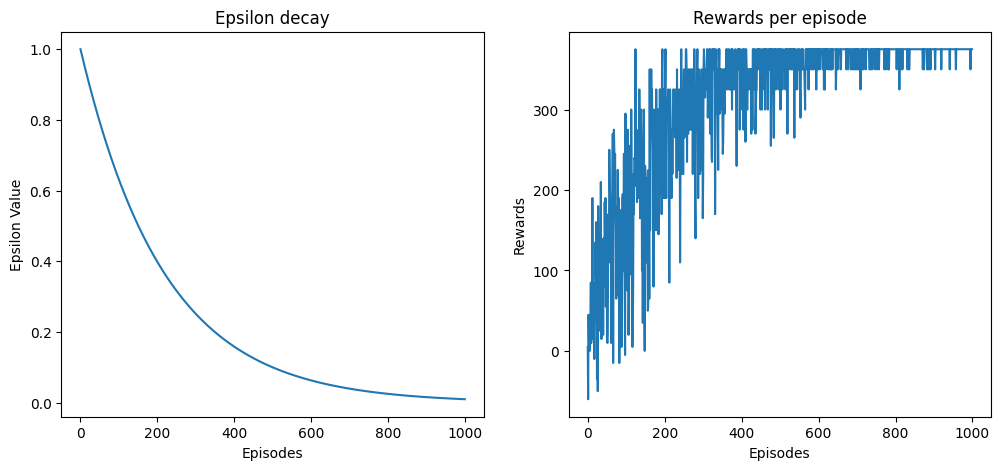

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Discount Factor -  Setup2**

In [ ]:
q_table, rewards_list, epsilon_values = sarsa(discount_factor = 0.7, timesteps = 15, num_episodes = 1000)

Q Table: 
 [[83.28621929 48.94026059 78.18688833 51.19020689]
 [ 7.18535382  1.08743009  1.15823707  3.77108235]
 [ 5.2034215   0.95107715 10.34602722  2.09319896]
 [36.20737237 12.64669629 14.10092352  2.05721365]
 [ 2.47901877  3.75428851  7.25979712  0.86394397]
 [ 2.28563488  1.88068641 18.25801737  2.3998767 ]
 [10.34086125  3.31317155 40.29677981 10.39144176]
 [47.29182893 12.66746922 41.60035948 14.80058823]
 [17.51614475  1.78179847  1.61588535  1.31828056]
 [-4.30187905 11.0287387   1.73603286  3.26646422]
 [48.97863748  7.34358085 16.12434494  4.20960818]
 [81.10795564 44.79256827 51.56063493 25.90798198]
 [15.77577765  2.01408678 -1.49112859 16.43449668]
 [-4.38805507  0.82218148 48.5018175  16.80268602]
 [50.11137454 22.29232169 80.91046715 14.57388716]
 [80.31028187 55.41206879 83.33302579 56.31714208]]


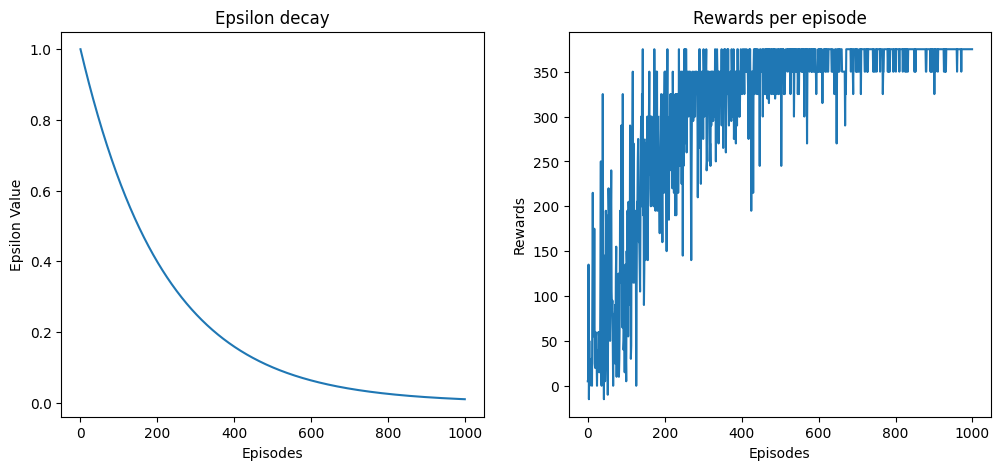

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Discount Factor - Setup3**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.9, timesteps = 15, num_episodes = 1000)

Q Table: 
 [[247.43204425 189.60495316 182.01057883 195.41477335]
 [  8.59263171   4.53940166   5.79489586  60.6512998 ]
 [ 15.89627843   1.70176781  16.84665375  13.81027865]
 [ 51.64628712  23.19105451  17.27967644   5.10454395]
 [  0.39563925  42.99634728  10.8032282    1.3785197 ]
 [  1.76135308  16.17397019  29.59792982   2.14351772]
 [ 15.80737903   5.3623043   73.84359498  10.05545847]
 [168.31892134  17.70405455  63.2201532   34.58122814]
 [ 12.35164324   1.9705512    1.25865586   2.84332725]
 [  5.18754398  16.8745191   52.90278404   4.97564942]
 [188.66776149  20.62831113 107.29154409  16.41393028]
 [244.6633024  123.81704514 178.52089395 105.93971397]
 [ 17.53342235   3.4883774   11.87734265  32.92813228]
 [ 10.78583862  11.25440032 177.72939204  21.96446552]
 [161.79869746 118.02025316 243.25746914 105.4709787 ]
 [237.47581302 217.38609294 249.53692148 216.04344168]]


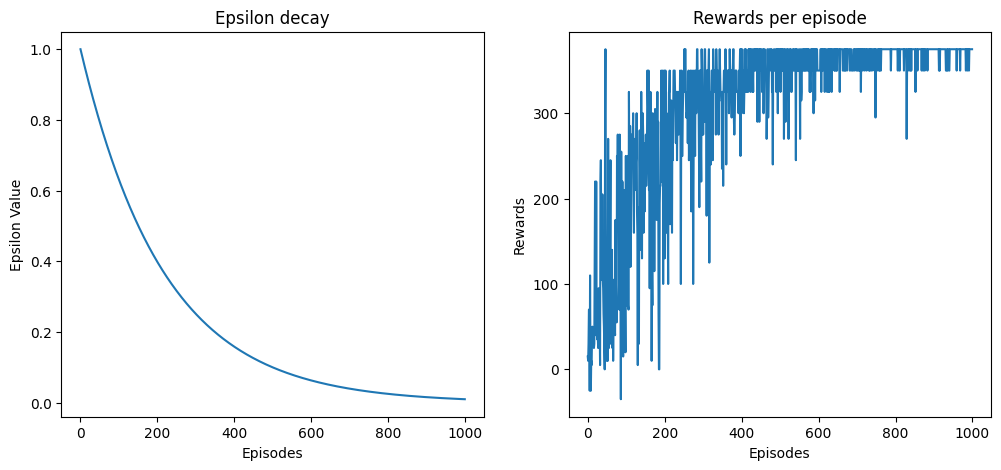

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

2**. Numberof Episodes - Setup1**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 15, num_episodes = 2500)

Q Table: 
 [[450.87289454 457.44290351 494.88245053 437.19904667]
 [ 31.93604518  19.53781216  22.87999458 154.66986982]
 [ 54.73434249  24.82071729  89.09833915  34.32182164]
 [236.27250239  63.08338922  66.71017443  30.05275144]
 [ 19.13056366 151.49272802  32.88802412  21.67329059]
 [ 16.90379409  41.91482114  95.2964627   43.42689256]
 [104.51511079  34.69404516 296.09786275  40.44601733]
 [404.97563427 108.8259251  174.57547817 130.81275763]
 [ 53.26515365  41.49995152  17.06667939  10.65557602]
 [ 39.53824601  46.83611576 214.1550494   25.46999084]
 [297.53627482 156.59944865 428.06801425 107.77722169]
 [492.29680465 292.40479752 387.88466439 306.48540879]
 [ 45.88901152  21.77635405  85.07126217  34.79934583]
 [126.07453789  70.75312549 378.26653811  46.33690979]
 [391.03021554 326.35718422 492.39535418 312.43438427]
 [488.03081603 467.81731226 495.24648128 466.04342291]]


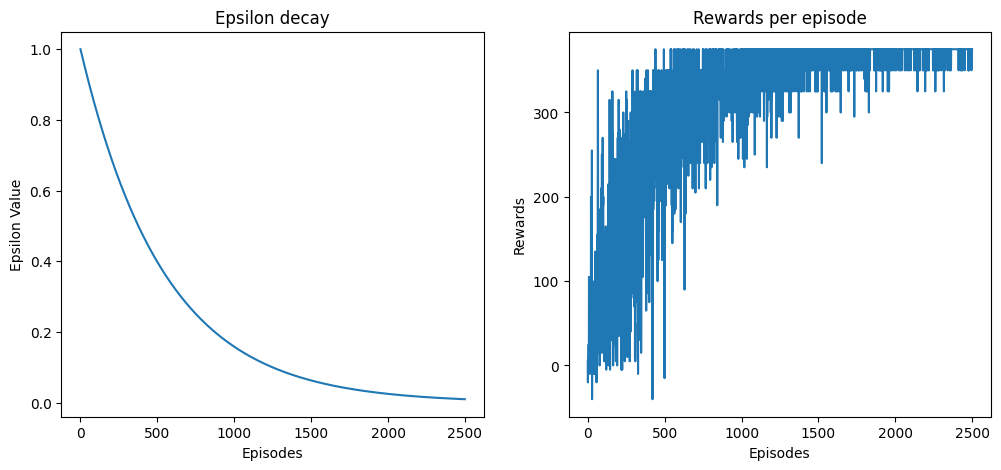

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Numberof Episodes - Setup2**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 15, num_episodes = 1500)

Q Table: 
 [[432.45986038 414.18755134 496.18894096 389.77803362]
 [ 15.2188487    9.736764    18.70567765 123.14424001]
 [101.34157444   3.07615021  16.90072329  21.85974433]
 [200.18379193  18.17638945  27.13137831  18.73082664]
 [  5.07977095  10.40996207  19.08908978   2.47822033]
 [ 10.83019135  18.44210443  76.53581921   4.95372591]
 [ 43.93185673  22.75195361 220.00231433  16.62613391]
 [373.28179402  91.83786666 130.45739307  89.63931486]
 [ 32.50211137   2.19040631  10.97603827   3.66368098]
 [  2.84665207  26.16354376 121.25423468  15.56118818]
 [152.39119708 122.77282047 376.55239101  34.55407813]
 [490.40550145 259.65899794 372.66551581 229.37612957]
 [ 36.91615685  12.4030508  127.26987367  30.10207403]
 [ 47.44229388   7.43366033 357.9651492   39.63543444]
 [312.45068697 259.28719    488.4111777  258.31951986]
 [486.09078049 463.65337958 498.16958322 450.22165307]]


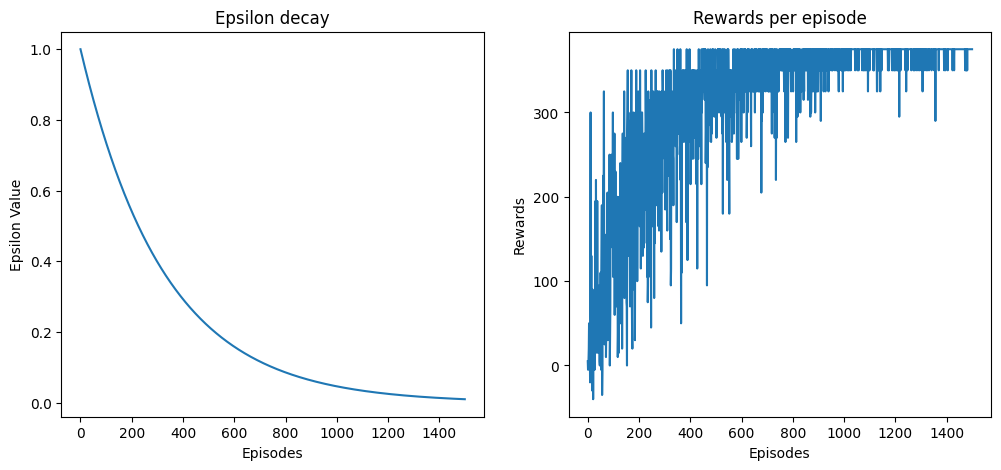

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Numberof Episodes - Setup3**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 15, num_episodes = 2000)

Q Table: 
 [[462.01073616 437.75519594 495.68564528 425.47043125]
 [ 23.64620807   5.4000506   14.59612275  14.59264511]
 [100.48671251  29.83076721  15.18973305   7.99023683]
 [167.80933344  37.08077612  37.65800838  21.72544544]
 [  5.417612    12.74478132  17.39609445   3.43460595]
 [ 27.19156066   9.80260896  37.97179472   7.10686267]
 [ 80.78266554  38.37259422 207.01687226  26.03738129]
 [399.48183826  80.49699876 179.64772644  85.7233774 ]
 [ 34.16176803   8.33410016   7.31958024   9.72703854]
 [ 15.69554011  21.64740613 165.80695587   8.32679741]
 [178.02455116 133.97759982 400.26607469  65.18619132]
 [491.240588   320.6094306  375.26873931 300.38249136]
 [ 38.71606389  15.40643143  76.59529151  43.06910557]
 [102.60015071  38.22578601 374.67192591  39.68775572]
 [345.98281283 326.0910427  494.07534406 282.81335631]
 [491.18138865 465.74052132 499.28209537 455.69528253]]


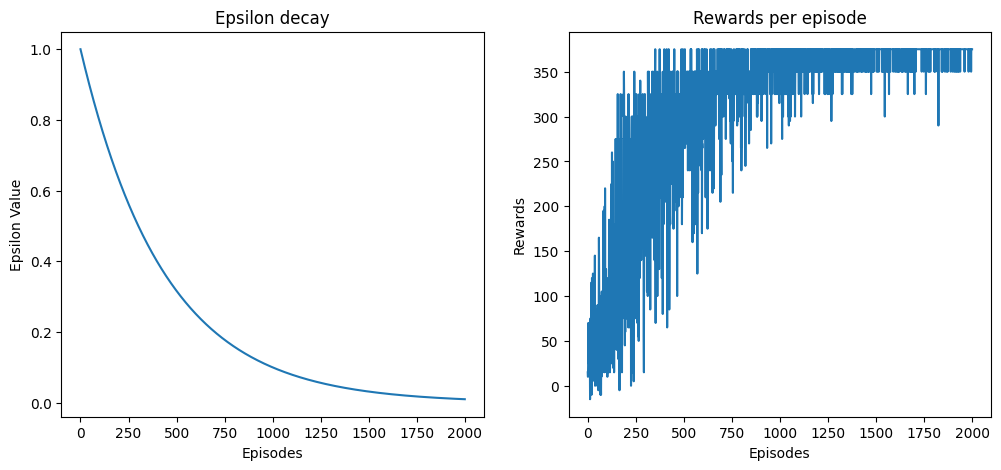

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**3. Maximum timesteps - Setup1**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 20, num_episodes = 2000)

Q Table: 
 [[456.52062164 431.78935685 495.9131448  445.62761633]
 [ 33.17352972  13.65632171  12.05845282  48.58482646]
 [ 34.54931895  15.20509594  87.28384782  14.23412979]
 [190.37129175  60.50180087  64.84632301  35.54099232]
 [ 21.2019441  131.74378023  24.97052456  21.44541821]
 [ 19.07042992  16.79208124  97.59353089  18.4726012 ]
 [102.99031964  34.57505209 270.55818254  51.23361667]
 [409.1547556   95.25612047 140.91318738 121.46891596]
 [ 43.28993199  28.81138227  34.20170992   9.75048822]
 [117.77811865  47.12956794 211.30053671  18.3921131 ]
 [273.48356934 157.55215193 372.47633576 107.44618595]
 [491.0055523  344.38679757 417.60211583 280.87784267]
 [ 50.87331139  18.02607036 136.37777634  41.31070458]
 [203.33983927 104.801194   405.49169001  66.8761373 ]
 [403.13290601 328.40907052 491.70970948 319.57357657]
 [492.31769737 465.33972091 489.03892733 465.37376352]]


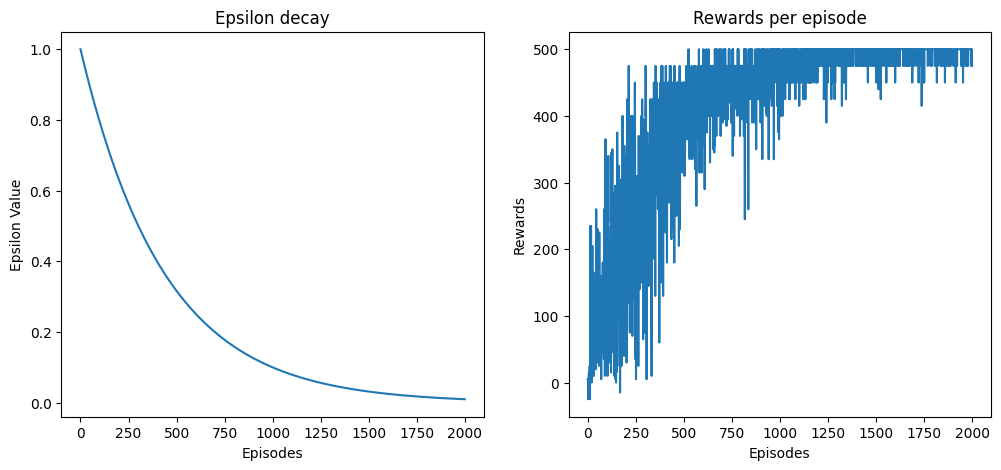

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Maximum timesteps - Setup2**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 25, num_episodes = 2000)

Q Table: 
 [[494.86755185 447.10669498 480.24358347 451.12923635]
 [ 36.85586433  53.54906402  27.92870957 144.40459062]
 [110.21218957  35.02711698  50.86342271  13.71018426]
 [252.60972136  54.49634306  49.98080747  40.82342648]
 [ 15.12156703 101.94729055  35.27793688  35.22966727]
 [ 51.25600783  41.0486591  135.24038497  28.29729773]
 [293.48391288  39.17679765 173.08582335  56.7548722 ]
 [415.01834688 171.61123413 236.15499543 149.35032181]
 [ 53.3159761   27.95550701  55.96967629  12.0575548 ]
 [ 76.08771006  54.60376497 268.50054505  16.88873467]
 [296.31345454 176.10204274 439.52367149 154.67221193]
 [492.7880707  342.71714102 402.65755792 361.63983281]
 [ 40.39910088  18.27247346 219.02829315  35.61108756]
 [145.8515235   81.59158327 389.04272899 132.43750109]
 [408.4791519  344.43866254 491.08143936 286.49393364]
 [497.37503485 467.48971318 484.18685985 431.50012276]]


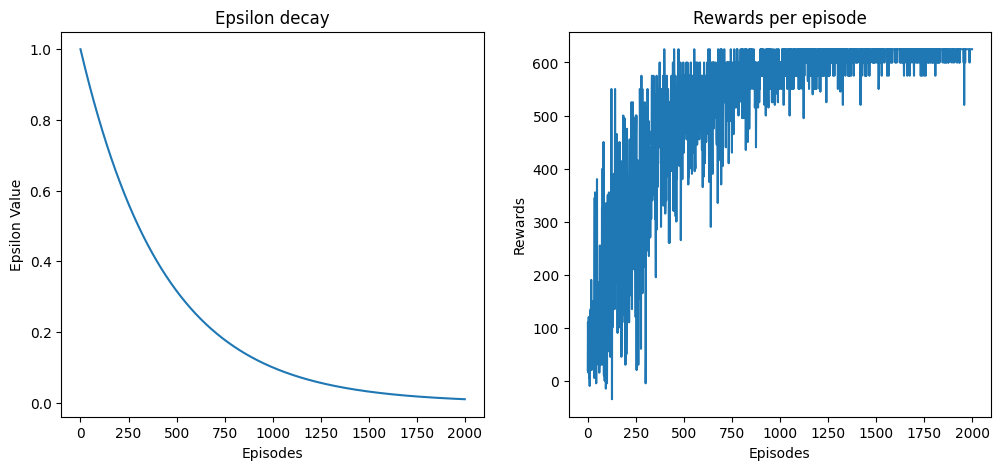

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Maximum timesteps - Setup3**

In [ ]:
q_table, rewards_list, epsilon_values =sarsa(discount_factor = 0.95, timesteps = 10, num_episodes = 2000)

Q Table: 
 [[488.82631778 441.81461904 465.89432765 428.19615592]
 [  9.37224351   6.53072987   5.6803171   45.46938543]
 [ 22.48590085   3.95560333   9.04405596   4.19618379]
 [112.21075021  21.11707881   9.40778088   7.85074329]
 [ 12.8171951   36.81337504  10.06790321   6.75566518]
 [  7.56412233   8.7510998   29.35322159   6.60691994]
 [ 56.39162901   9.72652042 210.56551189  19.20617288]
 [339.36259813  58.61420576 114.09839831  86.73002629]
 [ 40.0096641   11.31321272   4.91217348  13.55742487]
 [  1.14299607  15.72319142 102.21099726  11.23348905]
 [160.24494844  73.00854329 363.16762086  15.85346241]
 [491.91982207 210.10458943 294.90517601 161.86938697]
 [ 36.33917267  22.61664024  51.10109439  50.31855956]
 [ 35.38191828  24.23773774 260.72587578  38.05754974]
 [310.48522475 250.37324201 489.16566884 125.51930691]
 [489.91266471 465.31304164 482.1403115  437.96869809]]


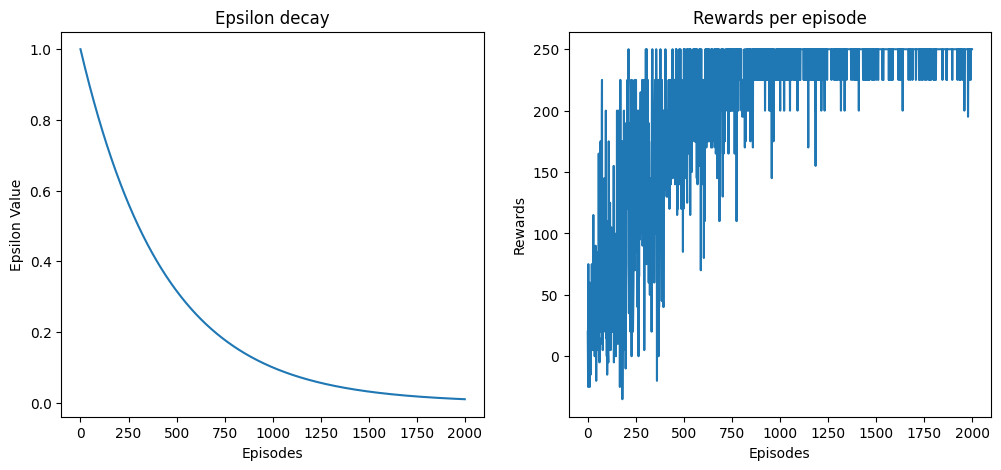

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

# **Part III - Q Learning**

In [24]:
env = GridEnvironment()
obs = env.reset()
agent = RandomAgent(env)
def greedy(q_table, episode, current_state, start_epsilon, min_epsilon, decay_rate):
    eps = max(min_epsilon, (start_epsilon - min_epsilon)*np.exp(-decay_rate*episode))
    rand_num = np.random.uniform(0, 1)  
    if eps > rand_num: 
        action = agent.step(obs)
    else:
        action = np.argmax(q_table[current_state,:])
    return action
def q_learning(q_table, num_episodes, timesteps=10, learning_rate=0.15, discount_factor=0.95):
    start_epsilon = 1.0
    min_epsilon=0.0
    decay_rate = 0.005
    q_table = np.zeros((16, 4))
    epsilon=start_epsilon
    rewards_list, epsilon_values= [],[]
    total_episodes = num_episodes
    states = {}
    row_val = 0
    index_value = 0
    while row_val < 4:
        column_val = 0
        while column_val < 4:
            states[(row_val, column_val)] = index_value
            index_value += 1
            column_val += 1
        row_val += 1
    for episode in range(1, total_episodes+1):
        env = GridEnvironment()
        obs = env.reset()
        agent = RandomAgent(env)
        total_rewards = 0
        reward=0
        done = False 
        current_state = 0 
        for timestep in range(timesteps):
            action = greedy(q_table, episode, current_state, start_epsilon, min_epsilon, decay_rate)
            prev_reward = reward
            next_state_pos, reward, done = env.step(action)
            next_state = states[tuple(next_state_pos)]
            q_table[current_state][action] = q_table[current_state][action] + learning_rate * (reward + discount_factor * (np.max(q_table[next_state,:])) - q_table[current_state][action])
            total_rewards += reward 
            if done:
                break  
            current_state = next_state          
        rewards_list.append(total_rewards)
        epsilon_values.append(max(min_epsilon, (start_epsilon - min_epsilon)*np.exp(-decay_rate*episode))) 
    print("Q Table: \n", q_table)
    return q_table, rewards_list, epsilon_values

In [25]:
q_table = np.zeros((16, 4))
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=10, learning_rate=0.15, discount_factor=0.99)

Q Table: 
 [[ 8.49719398e+02  9.67160836e+02  1.46035639e+03  9.51395319e+02]
 [ 1.47510999e+03  1.01928439e+03  9.38475535e+02  1.09757587e+03]
 [ 1.27333361e+03  5.21192057e+02  9.12540551e+01  3.69819802e+02]
 [ 1.46262004e+03  3.93590534e+02  3.70273465e+02  2.88777078e+02]
 [ 2.76142177e+01  2.39085963e+02  1.30051490e+03  9.95479220e+01]
 [ 6.52050244e+02  9.82514044e+02  1.48496200e+03  8.80853754e+02]
 [ 8.52191645e+02  8.71446001e+02  1.49996391e+03  1.16253149e+03]
 [ 1.35132872e+03  1.40855883e+03  1.49996572e+03  1.44060979e+03]
 [ 5.56642021e+01  9.04894224e+00  2.03896888e+01  1.33917557e+01]
 [ 9.67245908e+00  1.10573484e+03  2.65114236e+01  1.28580295e+01]
 [ 6.95158095e+00  1.16857724e+03  2.61766132e+02  3.83294077e+01]
 [ 5.76102716e+01  1.43279254e+03  2.45557595e+02  2.15421016e+02]
 [ 3.03057887e+01  1.35226072e+01  8.60859458e+00  7.64771019e+01]
 [-1.02638196e+00  2.46079874e+01  1.04249910e+00  4.33912730e+01]
 [ 2.35172596e+00 -6.50839301e-01  2.70403273e+01 -

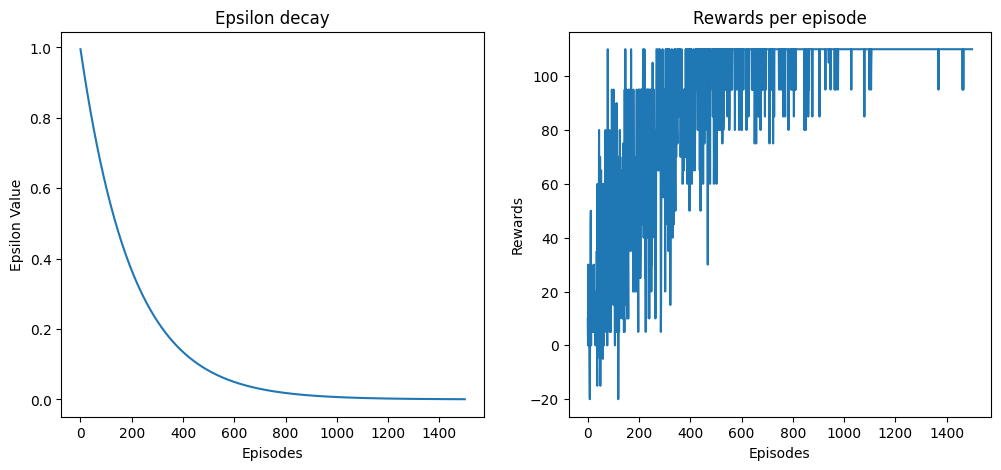

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

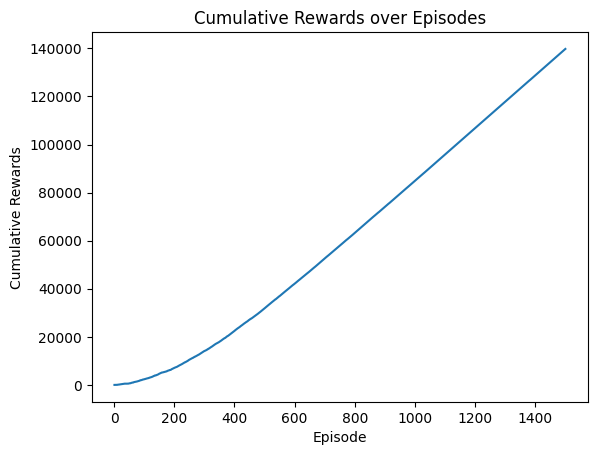

In [ ]:
cumulative_rewards = [sum(rewards_list[:i+1]) for i in range(len(rewards_list))]
plt.plot(range(1, len(rewards_list) + 1), cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards over Episodes')
plt.show()

**Evaluation Results - QLearning**

Q Table: 
 [[ 8.70779083e+02  9.46473670e+02  1.46035780e+03  1.10001887e+03]
 [ 1.47511134e+03  1.18317946e+03  6.90428408e+02  1.14250183e+03]
 [ 2.77576842e+02  1.39353326e+02  1.05077311e+03  1.43026202e+02]
 [ 1.40330871e+03  4.95757629e+02  1.19149883e+02  2.62483499e+02]
 [ 1.29008480e+02  2.62604602e+02  1.30629008e+03  2.69399960e+02]
 [ 7.52659979e+02  1.19219685e+03  1.48496329e+03  9.65578259e+02]
 [ 7.22143350e+02  6.15366565e+02  1.49996513e+03  1.26589311e+03]
 [ 1.40337815e+03  1.33831511e+03  1.49996689e+03  1.42714445e+03]
 [ 1.43508399e+01  4.12033409e+02  5.73630279e+00  3.28213042e+00]
 [-3.39450235e+00  1.16356812e+03  5.24957397e+01  1.94971446e+01]
 [ 9.26792130e+00  1.04179630e+03  1.42364964e+02  1.79986882e+02]
 [ 2.50224631e+01  1.46065438e+03  1.68904922e+02  1.94838176e+02]
 [ 3.62760536e+00  5.21854262e+01  0.00000000e+00  1.73956179e+00]
 [ 0.00000000e+00  2.90681933e-01  0.00000000e+00  1.31238629e+01]
 [ 0.00000000e+00 -1.23451252e+00  3.63799431e+01 -

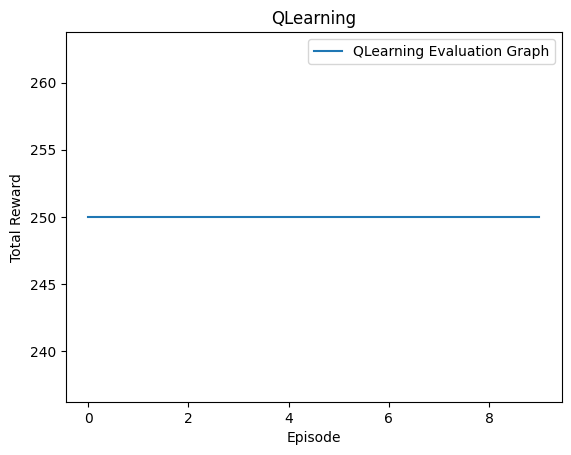

In [26]:
env = GridEnvironment()
q_table = np.zeros((16, 4))
q_table_qlearning, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=10, learning_rate=0.15, discount_factor=0.99)
num_evaluation_episodes = 10
rewards_ql_evaluation = []
states = {}
index_value ,row_val= 0,0
while row_val < 4:
    column_val = 0
    while column_val < 4:
      states[(row_val,column_val)] = index_value
      index_value = index_value + 1
      column_val = column_val + 1
    row_val = row_val + 1
for _ in range(num_evaluation_episodes):
    total_reward_ql = 0
    obs = env.reset()
    current_state = 0
    done = False
    e=0
    while e<num_evaluation_episodes:
        action = np.argmax(q_table_qlearning[current_state])
        observation, reward, done = env.step(action)
        total_reward_sarsa += reward
        current_state = states[tuple(observation)]
        if done:
            break
        e+=1
    rewards_ql_evaluation.append(total_reward_ql)

plt.plot(rewards_sarsa_evaluation, label='QLearning Evaluation Graph')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('QLearning')
plt.legend()
plt.show()

# **Hyperparameter Tuning**

**Discount Factor - Setup1**

In [ ]:
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=10, learning_rate=0.15, discount_factor=0.95)

Q Table: 
 [[261.9625     231.55003684 249.9649488  238.45010902]
 [274.65355061  80.91334366  52.25884239 132.66995729]
 [275.91431134  82.01129474  70.07374288  47.90279588]
 [299.98770693  58.63960821 145.68990569 100.35265092]
 [159.62410839 228.05217096 275.75       246.01576655]
 [231.53155201 240.29788583 285.         252.74066989]
 [211.40702979 232.26029071 300.         264.41597134]
 [284.7770318  284.93173653 300.         284.97439805]
 [ 66.9623116  231.58419548  31.69409987  44.07460768]
 [  7.96642584 265.61033576  45.68441079  29.44290008]
 [ 10.42790843 270.53259205  52.31085189  59.08589608]
 [ 41.91219603 299.94627199 121.10390439  78.72978698]
 [ 57.06164484  35.68000048  13.93277981  83.6873081 ]
 [ -0.79006433   3.63066583   7.19622709  53.35515489]
 [  0.           5.66704277  31.14495862   0.46406417]
 [ 50.01584613  22.47654641  24.86258262   0.        ]]


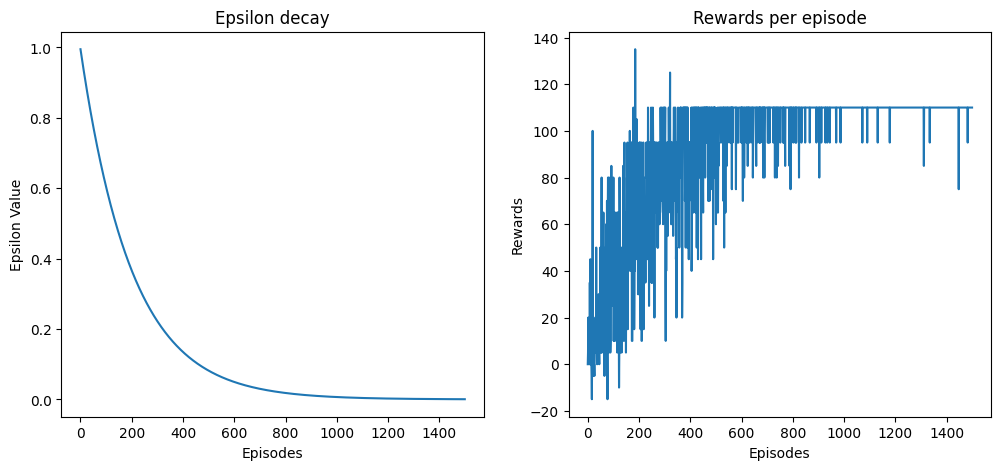

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Discount Factor - Setup2**

In [ ]:
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=10, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[ 9.02944132e+01  1.19825469e+02  1.63057500e+02  1.17027570e+02]
 [ 1.81175000e+02  1.37877570e+02  1.07842262e+02  1.31690017e+02]
 [ 2.63419677e+01  2.53206763e+01  1.73241702e+01  1.58153103e+02]
 [ 1.87285294e+02  3.96517698e+00  5.89179200e+00  1.69482924e+01]
 [ 2.62993699e+01  3.03518439e+01  1.63463971e+02  2.48566987e+01]
 [ 1.09344407e+02  1.36766414e+02  1.95750000e+02  9.59685284e+01]
 [ 1.38007295e+02  1.06490366e+02  2.17500000e+02  1.71214487e+02]
 [ 2.25000000e+02  1.21058627e+02  1.83168590e+02  1.52352900e+02]
 [ 4.18395305e+01  7.62330707e+00  6.54730145e+00  1.38465935e+01]
 [-1.24529653e+00  1.60639327e+02  1.09253669e+00  1.98605608e+01]
 [ 2.14693170e+02  2.00923146e+01  2.53350696e+01  2.36552900e+01]
 [ 2.50000000e+02  1.79003695e+02  2.18589113e+02  1.34647040e+02]
 [ 4.56911752e+01  2.02178567e+01  1.09481189e-01  2.49808572e+01]
 [-2.45542900e+00  2.10605413e+00  3.82732765e+00  2.34451041e+01]
 [ 3.87179168e+01  4.06997518e+01  2.49795535e+02 -

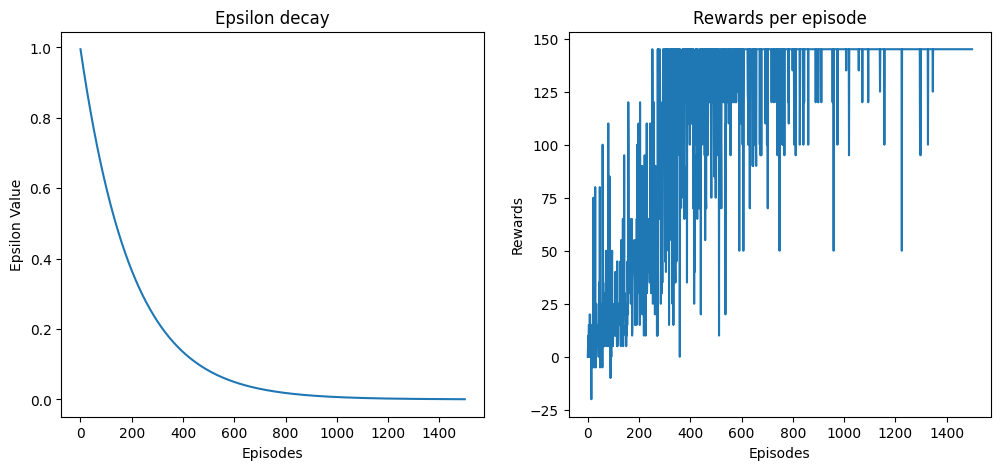

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Discount Factor - Setup3**

In [ ]:
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=10, learning_rate=0.15, discount_factor=0.89)

Q Table: 
 [[ 98.31414416  83.70483999 100.58213636  88.50174134]
 [113.01363636 100.04312352 105.93624896  88.72446385]
 [121.32590729  21.76273409  84.2026113   57.95998708]
 [136.36333974  93.11821835  69.33363348  57.21554434]
 [ 39.00840646  34.50599458 112.85722068  62.71040557]
 [ 92.0867153   98.07995932 121.36363636  95.44961297]
 [100.57782485 106.55094846 136.36363636 112.61636249]
 [121.35725849 121.36255041 136.36363636 121.36356709]
 [ 53.94330414  12.08164485  16.46064815  18.76147472]
 [ -3.4234132  110.99165896   2.62951995  16.94181329]
 [ 15.9535906  120.90993892  28.47248972  10.01025524]
 [ 41.23462746 136.36170755  53.39881806  39.36262531]
 [ 61.5912468   21.99117948  12.26355914  41.03789876]
 [  0.34579033  11.43466471   7.79754629  36.8953421 ]
 [  0.          -0.75        36.20903127   0.22429245]
 [ 61.64685008   0.500625    18.3495905    5.64745348]]


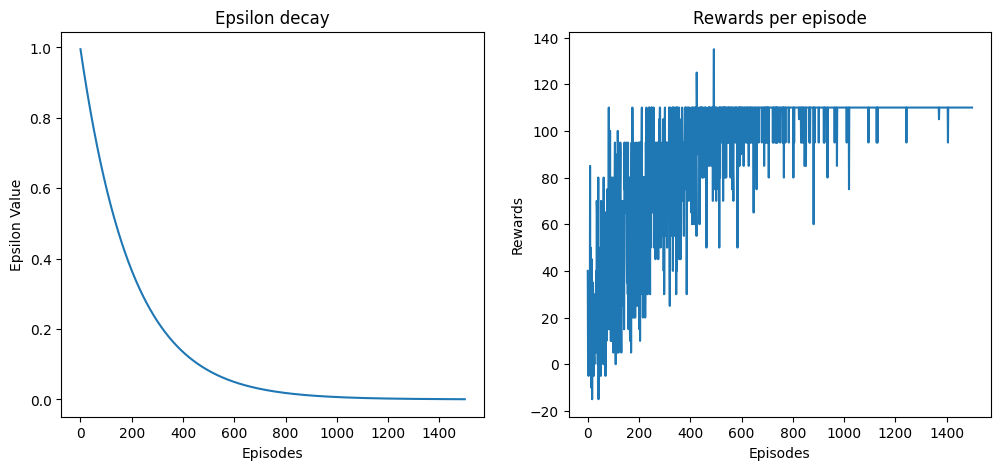

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Maximum Timesteps - Setup1**

In [ ]:
q_table, rewards_list ,epsilon_values=q_learning(q_table, num_episodes=1500, timesteps=20, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[163.0575     134.51911025 156.71534896 137.38889561]
 [180.4930362   71.92424255  60.17439273  47.43959254]
 [184.48166701  46.45964947  50.68882433  34.32504822]
 [205.35168007  43.73812141  36.57142168  41.15875518]
 [164.92499994 134.66163899 181.175      154.52809582]
 [126.13104907 138.49631013 195.75       125.91287282]
 [187.48778624 137.56940073 217.5        143.36076636]
 [225.         157.19375804 203.87273844 187.98477435]
 [183.24999999 128.24718432 138.85816684 159.72976818]
 [109.21994029 102.39578536 137.48037753 164.79370696]
 [161.59647679 145.53602864 224.98224267  80.62191824]
 [250.         216.49037158 222.4177101  195.2490652 ]
 [178.13790501 154.88751424 192.5        175.9794116 ]
 [185.45336323 142.63520408 225.         179.68929734]
 [223.87071872 188.31990556 250.         192.00553257]
 [250.         225.         250.         225.        ]]


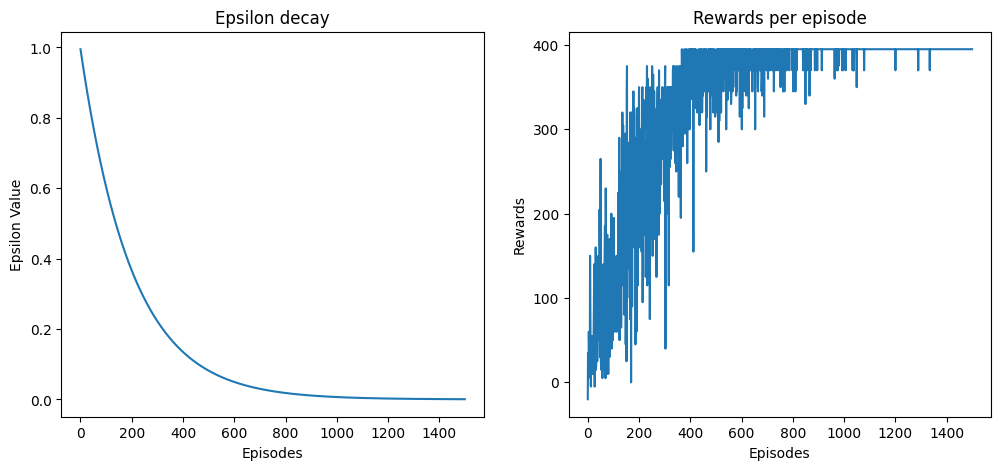

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Maximum Timesteps - Setup2**

In [ ]:
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=25, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[160.59572814 146.51165604 163.0575     145.88246102]
 [181.175      162.74932625 175.63304425 146.50312722]
 [195.74957169 108.64733399 159.44583247 122.35594293]
 [217.48505778 103.03256234 142.19527785 117.88611166]
 [ 68.80471431  95.62260921 181.15859087  69.28071508]
 [161.54209416 162.95687376 195.75       161.68035512]
 [196.76673654 176.09632067 217.5        180.54877082]
 [225.         195.56793769 217.39743187 195.71383673]
 [ 55.1399125  123.86999467  16.3720019   19.63461748]
 [105.2047116  180.8366402  118.12288142  46.41186771]
 [193.66339418 161.3807011  224.99998422 112.34363794]
 [250.         217.49623988 224.99880798 197.48251677]
 [ 67.83487965  28.70425923  92.91389088  51.7479612 ]
 [ 51.12141096  62.90964222 223.54725825  52.69863712]
 [224.48132172 195.56555474 250.         181.82761608]
 [250.         225.         250.         225.        ]]


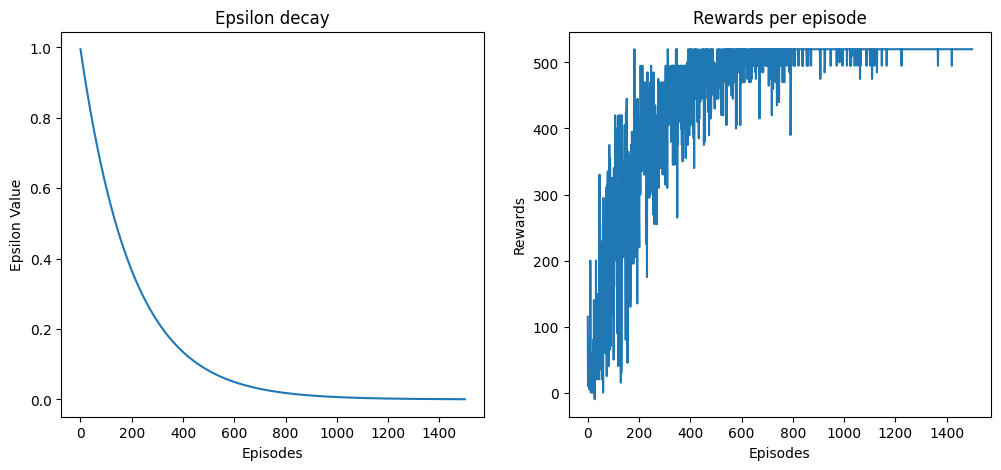

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Maximum Timesteps - Setup3**

In [ ]:
q_table, rewards_list,epsilon_values =q_learning(q_table, num_episodes=1500, timesteps=30, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[163.0575     146.60266478 161.98314555 146.05903634]
 [181.1606086   92.36078581 129.74896101 115.22300427]
 [120.34547894 118.479965   195.59794834  55.76657207]
 [217.49982085 165.08398626 125.4718208  147.75454859]
 [144.85540433 146.41966631 181.175      162.780404  ]
 [176.35357396 161.73534554 195.75       162.78096993]
 [197.16920217 173.09620866 217.5        177.89680478]
 [225.         195.67149639 217.46963088 195.68949027]
 [ 59.27998428 162.73547279 103.73567506  76.8237186 ]
 [133.40045    151.92653296 197.41744601  99.22531986]
 [219.04262277 193.5117841  224.99999999 170.56293884]
 [250.         217.49991077 224.99967998 197.4999262 ]
 [ 46.81267379  58.49588111 109.99509094  50.34103212]
 [112.68072065  82.98513233 224.97815335  56.03222914]
 [224.52660234 197.39560477 250.         192.28868131]
 [250.         225.         250.         225.        ]]


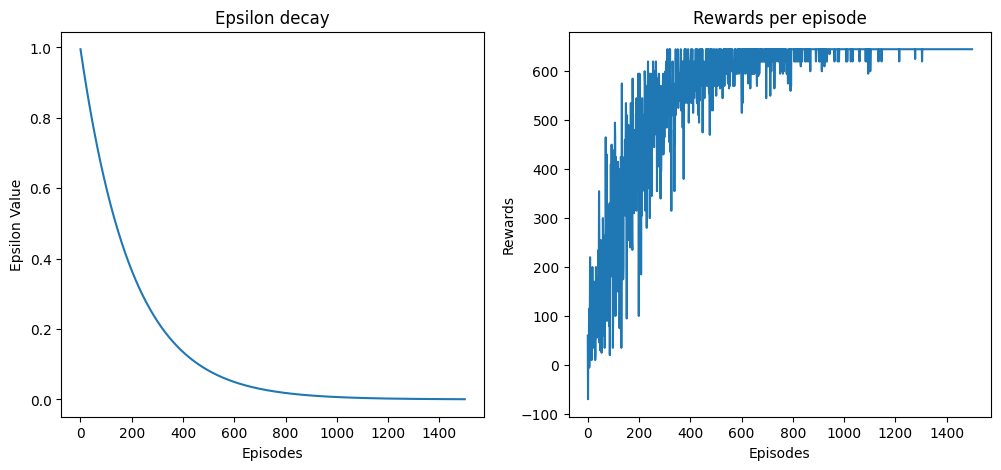

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Number of episodes - Setup1**

In [ ]:
q_table, rewards_list ,epsilon_values=q_learning(q_table, num_episodes=1500, timesteps=30, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[163.0575     146.68095467 162.50145257 146.68895869]
 [181.16370094 117.79255204 105.31272329 121.2538123 ]
 [115.64237376 101.62320015 193.55336768  81.80446915]
 [217.4436158   96.40165923 146.50440807 121.44447567]
 [162.71182025 146.52006963 181.175      162.54022607]
 [177.1766915  160.69680383 195.75       162.0666834 ]
 [197.19473816 163.63342074 217.5        179.4581964 ]
 [225.         192.6178892  217.45979834 193.83485215]
 [182.54115236 115.81695243 130.93658687 117.88096479]
 [158.82726279 142.3139582  197.48118345 110.29684711]
 [218.79947887 188.27591443 225.         172.51135299]
 [250.         217.49972626 224.99999201 197.499954  ]
 [158.44846284 128.14555153 192.38748501 144.54436137]
 [175.0680815  144.06293222 224.99921315 141.190358  ]
 [224.91202312 197.4536005  250.         192.02512999]
 [250.         225.         250.         225.        ]]


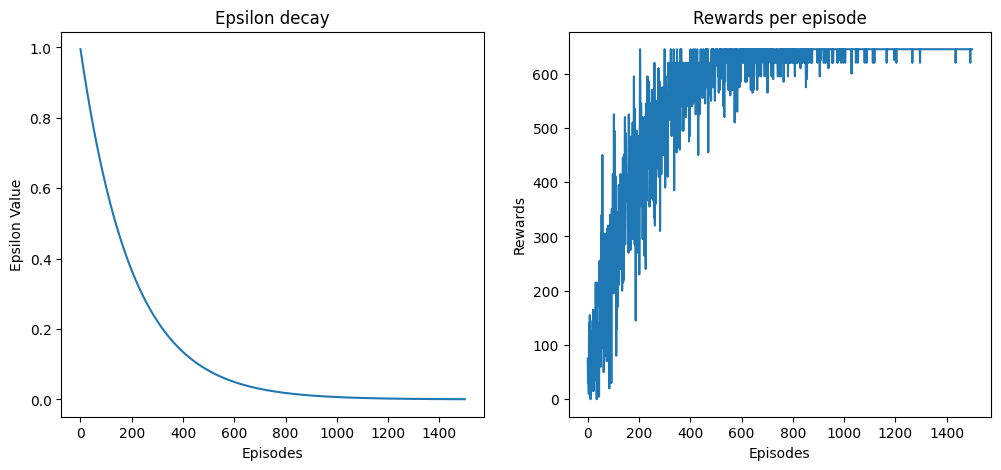

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Number of episodes - Setup2**

In [ ]:
q_table, rewards_list ,epsilon_values=q_learning(q_table, num_episodes=2000, timesteps=30, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[163.0575     146.40684482 162.20450844 145.83461664]
 [181.16930681 129.50909186 113.8901431  107.91641187]
 [194.3504988   77.18737184 100.29634055 108.65001874]
 [217.40150689 114.82910894 126.00343476 107.24208749]
 [161.97287144 140.14653679 181.175      162.52855141]
 [174.64553514 162.32711105 195.75       162.40992254]
 [194.76422496 166.87047221 217.5        180.60555624]
 [225.         195.14552608 217.18506103 195.32358592]
 [182.58150508 107.87321029 107.4144529   84.96067012]
 [154.35433192 138.4669677  197.20339638 124.01979041]
 [224.99999973 188.06136572 220.42175207 164.5135864 ]
 [250.         217.49974927 224.99642476 197.49927717]
 [138.65583009 123.74774886 192.39038525 118.32073143]
 [170.80914982 140.5026422  224.99968953 149.23763843]
 [224.98559447 197.47419338 250.         192.39443585]
 [250.         225.         250.         225.        ]]


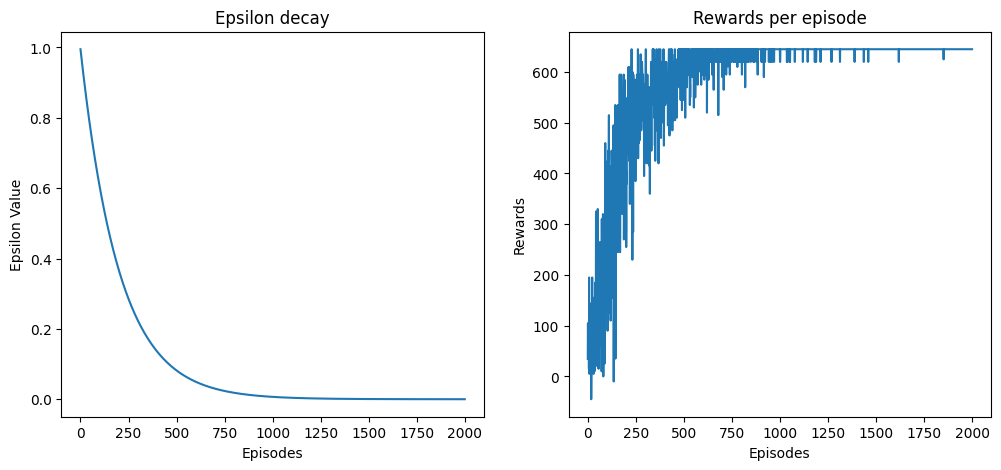

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

**Number of episodes - Setup3**

In [ ]:
q_table, rewards_list ,epsilon_values=q_learning(q_table, num_episodes=2500, timesteps=30, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[162.37127573 146.3808905  163.0575     146.20613066]
 [181.175      160.58226373 175.90975464 146.46869221]
 [195.74776238 129.85734086 167.11029252 131.53299338]
 [217.47592623 111.61826075 136.67148132  98.32460353]
 [ 56.4386425  123.88693558 181.17001208 108.97693822]
 [160.91289001 162.71115268 195.75       162.30345058]
 [197.26819425 175.66651445 217.5        181.07009014]
 [225.         195.46044755 217.48618199 195.59862291]
 [117.6134538   74.57461596  58.9006117   35.55396636]
 [111.74031487 181.00376944 133.05280524  57.91238189]
 [224.9999997  189.86515343 218.35462248 133.8140911 ]
 [250.         217.49973411 224.99996711 197.49915984]
 [ 50.99105663  36.12821059 174.41613939  69.02450301]
 [136.71137834 117.58664948 224.95530894 102.59931087]
 [224.98369341 197.47101075 250.         192.25254785]
 [250.         225.         250.         225.        ]]


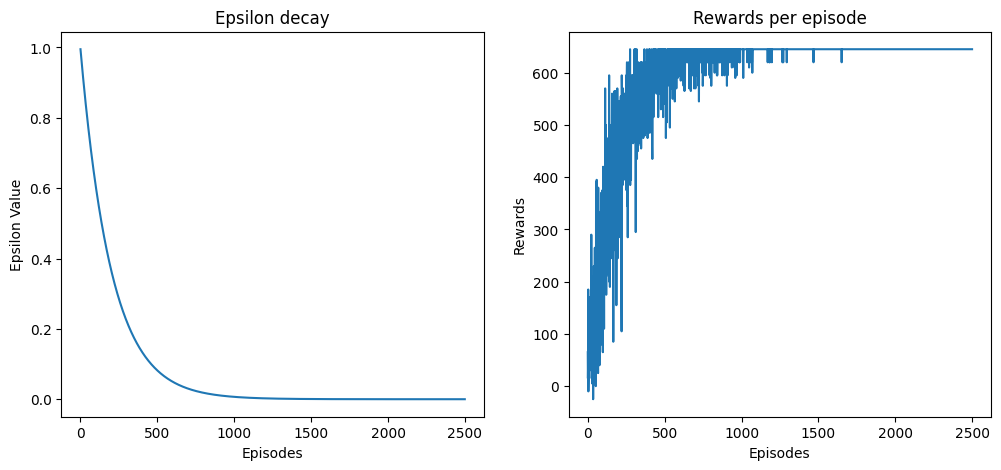

In [ ]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(12,5))

axs_1[0].plot(epsilon_values)
axs_1[0].set(title="Epsilon decay", xlabel="Episodes", ylabel="Epsilon Value")

axs_1[1].plot(rewards_list)
axs_1[1].set(title="Rewards per episode", xlabel="Episodes", ylabel="Rewards")

plt.show()

In [ ]:
q_table = np.zeros((16, 4))
q_table_sarsa, rewards_list_sarsa, epsilon_values_sarsa = sarsa(discount_factor = 0.90, timesteps = 15, num_episodes = 2500)
q_table_qlearning, rewards_list_qlearning ,epsilon_values_qlearning =q_learning(q_table, num_episodes=2500, timesteps=20, learning_rate=0.15, discount_factor=0.90)

Q Table: 
 [[241.84348976 206.86216678 236.71786197 208.74578442]
 [ 47.12558372  23.24710324  23.253824   112.00940509]
 [ 38.81653947  24.24654122  76.12314883  34.37993441]
 [130.10133073  61.67023284  64.78230452  25.18176467]
 [ 24.44174228  97.70672157  40.80868409  32.83921547]
 [ 39.35175406  39.77744097  90.53389654  32.69232409]
 [100.51951553  43.09278696 153.69579538  57.33688744]
 [204.27000166  95.74785575 145.74694546  97.61204342]
 [ 58.18363036  39.46579461  15.4113224   22.86165517]
 [ 71.18432692  41.74185484 118.32110511  30.12421011]
 [151.53232757 105.31842979 207.53478733  84.35600743]
 [240.93246875 173.96347986 201.31685437 160.21367072]
 [ 57.98819955  23.43914991 108.58946554  45.5434743 ]
 [ 95.27922571  66.70052668 189.5583607   74.38329912]
 [190.78723224 163.92826128 241.63131384 151.50841843]
 [235.63879734 213.51837122 239.14129093 217.58009459]]
Q Table: 
 [[155.0849732  132.36666417 163.0575     136.12380836]
 [181.175      151.29613237 158.32019417 1

 **Comparision of SARSA Vs Q Learning**

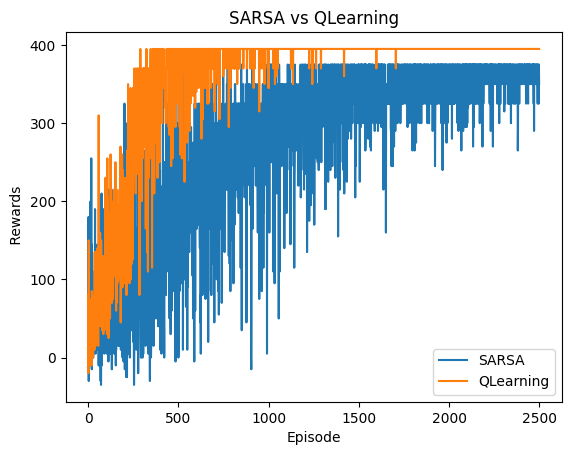

In [ ]:
plt.plot(rewards_list_sarsa, label='SARSA')
plt.plot(rewards_list_qlearning, label='QLearning')
plt.xlabel('Episode')
plt.ylabel(' Rewards')
plt.title('SARSA vs QLearning')
plt.legend()
plt.show()

**References**



*   https://piazza.com/class_school/spring2023/cse4574acd/resources
*   https://towardsdatascience.com/intro-to-reinforcement-learning-temporal-difference-learning-sarsa-vs-q-learning-8b4184bb4978
*   https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf
*   https://www.researchgate.net/publication/262400193_Backward_Q-learning_The_combination_of_Sarsa_algorithm_and_Q-learning





